<a href="https://colab.research.google.com/github/Sachithra-Priyadarshana/Sachithra/blob/main/Assgnment218979H.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization,activation
from keras.layers.convolutional import conv2d,MaxPooling2D
from keras.utils import np_utils
from keras.datasets import cifar100
import PIL
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow import keras

from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('The size of the train data is{}'.format(x_train.shape))
print('The size of the train data is{}'.format(x_test.shape))




The size of the train data is(50000, 32, 32, 3)
The size of the train data is(10000, 32, 32, 3)


In [ ]:
class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
plt.figure(figsize=(6,6))

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

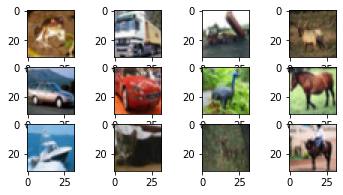

In [ ]:
for i in range(12):
  plt.subplot(4,4,1+i)
  plt.imshow(x_train[i])


([], <a list of 0 Text major ticklabel objects>)

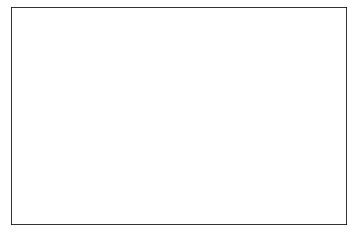

In [ ]:
plt.grid=False
plt.xticks([])
plt.yticks([])

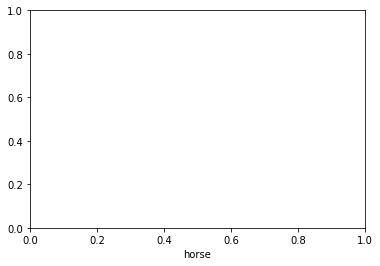

In [ ]:

   
plt.xlabel(class_names[y_train[i][0]])
plt.show()

In [ ]:
num_class=len(np.unique(y_train))
print('Total class{}'.format(num_class))

Total class10


In [ ]:
x_train=x_train.astype('float32')
x_test=x_train.astype('float32')
x_train=x_train/255
x_test=x_test/255

In [ ]:
num_of_classes=len(set(y_train.flatten()))
print(num_of_classes)

10


In [ ]:
batch_size=100
num_classes=10
epochs=10

In [ ]:
model=Sequential([
  layers.Conv2D(16,3,padding='same',input_shape=x_train.shape[1:],activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32,3,padding='same',activation='relu'),
   layers.MaxPooling2D(),
   layers.Conv2D(64,3,padding='same',activation='relu'),
   layers.MaxPooling2D(),
   layers.Conv2D(128,3,padding='same',activation='relu'),
   layers.MaxPooling2D(),
   layers.Flatten(),
   layers.Dense(256,activation='relu'),
   layers.Dense(num_of_classes),
   layers.Activation('softmax')
])


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 16, 16, 16)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 8, 8, 64)          18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 4, 4, 64)        

In [ ]:
#Fit Model

In [ ]:
history= model.fit(x_train,y_train, batch_size=batch_size,epochs=epochs,validation_data=(x_test, y_test),shuffle=True)


Epoch 1/10
500/500 [==============================] - ETA: 0s - loss: 0.2425 - accuracy: 0.9119

ValueError: ignored

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs_range=range(epochs)
plt.figure(figsize=(8,8))

NameError: ignored

In [ ]:
img_height=32
img_width=32

1/1 [==============================] - 0s 21ms/step
this image most likely belongs todog with 23.19 percent confidence.
Image after resizing to 32*32


(-0.5, 31.5, 31.5, -0.5)

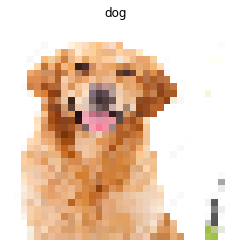

In [ ]:
from keras.utils.image_utils import img_to_array
dog_url="https://thumbs.dreamstime.com/z/golden-retriever-dog-sitting-isolated-white-24750809.jpg"
dog_path=tf.keras.utils.get_file('',origin=dog_url)
img=keras.preprocessing.image.load_img(dog_path,target_size=(img_height,img_width))
img_array=keras.preprocessing.image.img_to_array(img)
img_array=tf.expand_dims(img_array,0)

predictions=model.predict(img_array)
score=tf.nn.softmax(predictions[0])
print(
  "this image most likely belongs to{} with {:.2f} percent confidence."
  .format(class_names[np.argmax(score)],100*np.max(score))
)
print('Image after resizing to 32*32')
px=plt.subplot()
plt.imshow(img)
px.set_title(class_names[np.argmax(score)])
plt.axis("off")


In [ ]:
# Predicting if the image is horse or Not

1/1 [==============================] - 0s 16ms/step
this image most likely belongs tohorse with 23.20 percent confidence.
Image after resizing to 32*32


(-0.5, 31.5, 31.5, -0.5)

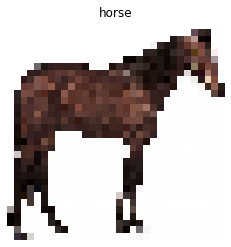

In [ ]:
from keras.utils.image_utils import img_to_array

horse_url="https://cdn.britannica.com/96/1296-050-4A65097D/gelding-bay-coat.jpg"
horse_path=tf.keras.utils.get_file('',origin=horse_url)
img=keras.preprocessing.image.load_img(horse_path,target_size=(img_height,img_width))
img_array=keras.preprocessing.image.img_to_array(img)
img_array=tf.expand_dims(img_array,0)

predictions=model.predict(img_array)
score=tf.nn.softmax(predictions[0])
print(
  "this image most likely belongs to{} with {:.2f} percent confidence."
  .format(class_names[np.argmax(score)],100*np.max(score))
)
print('Image after resizing to 32*32')
px=plt.subplot()
plt.imshow(img)
px.set_title(class_names[np.argmax(score)])
plt.axis("off")

1/1 [==============================] - 0s 16ms/step
this image most likely belongs toairplane with 23.20 percent confidence.
Image after resizing to 32*32


(-0.5, 31.5, 31.5, -0.5)

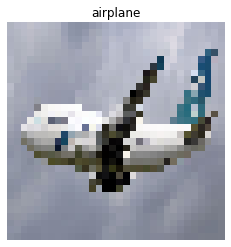

In [ ]:
# Predicting if the image is Airplane or Not
from keras.utils.image_utils import img_to_array

airplane_url="https://cdn.britannica.com/41/123141-050-E6229449/Air-New-Zealand-Boeing-747-400.jpg"
airplane_path=tf.keras.utils.get_file('',origin=airplane_url)
img=keras.preprocessing.image.load_img(airplane_path,target_size=(img_height,img_width))
img_array=keras.preprocessing.image.img_to_array(img)
img_array=tf.expand_dims(img_array,0)

predictions=model.predict(img_array)
score=tf.nn.softmax(predictions[0])
print(
  "this image most likely belongs to{} with {:.2f} percent confidence."
  .format(class_names[np.argmax(score)],100*np.max(score))
)
print('Image after resizing to 32*32')
px=plt.subplot()
plt.imshow(img)
px.set_title(class_names[np.argmax(score)])
plt.axis("off")